Студент Жилкин Федор, 344
# Домашняя работа 4: "Численное дифференцирование."
**Задания:**
1. Вычислить приближенно значения:
    1. Первой производной функции $f(x)$ с порядком погрещности $O(h)$ и $O(h^2)$
    2. Второй производной функции $f(x)$ с порядком погрещности $O(h^2)$

2. Вычислить вторую разностную производную второго порядка аппроксимации функции $e^{2x}$, последовательно уменьшая шаг h
3. Дифференцированием интерполяционного многочлена в форме Ньютона получить формулу численного дифференцирования для вычисления приближенного значения первой производной с третьим порядком аппроксимации в точке $x = x_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import pandas as pd

In [2]:
x = Symbol('x')
y = exp(2*x)
y

exp(2*x)

## Вычисление производных

In [3]:
def F(x):
    return np.exp(2*x)

In [4]:
def args_values_arrays(xl, xr, h=0.1):
    x = xl
    values = []
    args = []
    while x <= xr:
        args.append(np.round(x, 1))
        values.append(np.round(F(x), 5))
        x += h
    return args, values

In [5]:
args, values = args_values_arrays(0, 1)

In [6]:
def dfdx(f, ord_):
    for i in range(ord_):
        y = diff(f)
        f = y
    return lambdify(x, y, 'numpy')

In [7]:
def calculate_derivatives(args=args, values=values, h=0.1):
    i = 1
    accurate_derivs_1 = []
    accurate_derivs_2 = []
    derivs_1_h1 = [round((values[1] - values[0]) / h, 4)]
    derivs_1_h2 = [round((-3*values[0] + 4*values[1] - values[2]) / (2*h), 4),
                  round((-3*values[1] + 4*values[2] - values[3]) / (2*h), 4)]
    derivs_2_h2 = [nan]

    g1 = dfdx(y, 1)
    g2 = dfdx(y, 2)
    for arg in args:
        accurate_derivs_1.append(round(g1(arg), 4))
        accurate_derivs_2.append(round(g2(arg), 4))
    while i < len(values):
        derivs_1_h1.append(round((values[i] - values[i-1]) / h, 4))
        if i > 1:
            derivs_1_h2.append(
                round((3*values[i] - 4*values[i-1] + values[i-2]) / (2*h), 4))
        if i < len(values) - 1:
            derivs_2_h2.append(
                round((values[i+1] - 2*values[i] + values[i-1]) / (h**2), 4))
        i += 1
    derivs_2_h2.append(nan)
    return accurate_derivs_1, accurate_derivs_2, derivs_1_h1, derivs_1_h2, derivs_2_h2

In [8]:
derivs = list(calculate_derivatives())

In [9]:
def fill_table(args, values, derivs, func='f(x)'):
    a = {}
    a["$x$"] = args
    a["$f(x)$"] = values
    a["$f'(x)$"] = derivs[0]
    a["$f'(x)$ $+$ $O(h)$"] = derivs[2]
    a["$O(h)$"] = [x - y for x, y in zip(derivs[0], derivs[2])]
    a["$f'(x)$ $+$ $O(h^2)$"] = derivs[3]
    a["$O(h^2)$"] = [x - y for x, y in zip(derivs[0], derivs[3])]  
    a["$f''(x)$"] = derivs[1]
    a["$f''(x)$ $+$ $O(h^2)$"] = derivs[4]
    a["$(2)$ $O(h^2)$"] = [x - y for x, y in zip(derivs[1], derivs[4])]  
    
    
    df = pd.DataFrame.from_dict(a, orient='index')
    df = df.transpose() 

    a.pop("$x$")
    a.pop("$O(h)$")
    a.pop("$f(x)$")
    a.pop("$O(h^2)$")
    a.pop("$f''(x)$")
    a.pop("$f''(x)$ $+$ $O(h^2)$")
    a.pop("$(2)$ $O(h^2)$")
    
    df1 = pd.DataFrame.from_dict(a, orient='index')
    df1 = df1.transpose()    
   
    df1.plot(figsize=(20,8))
    
    return df.style.hide_index()

$x$,$f(x)$,$f'(x)$,$f'(x)$ $+$ $O(h)$,$O(h)$,$f'(x)$ $+$ $O(h^2)$,$O(h^2)$,$f''(x)$,$f''(x)$ $+$ $O(h^2)$,$(2)$ $O(h^2)$
0,1,2,2.214,-0.214,1.9689,0.0311,4,nan,nan
0.1,1.2214,2.4428,2.214,0.2288,2.4048,0.038,4.8856,4.902,-0.0164
0.2,1.49182,2.9836,2.7042,0.2794,2.9493,0.0343,5.9673,5.988,-0.0207
0.3,1.82212,3.6442,3.303,0.3412,3.6024,0.0418,7.2885,7.312,-0.0235
0.4,2.22554,4.4511,4.0342,0.4169,4.3998,0.0513,8.9022,8.932,-0.0298
0.5,2.71828,5.4366,4.9274,0.5092,5.374,0.0626,10.8731,10.91,-0.0369
0.6,3.32012,6.6402,6.0184,0.6218,6.5639,0.0763,13.2805,13.324,-0.0435
0.7,4.0552,8.1104,7.3508,0.7596,8.017,0.0934,16.2208,16.275,-0.0542
0.8,4.95303,9.9061,8.9783,0.9278,9.792,0.1141,19.8121,19.879,-0.0669
0.9,6.04965,12.0993,10.9662,1.1331,11.9601,0.1392,24.1986,24.279,-0.0804


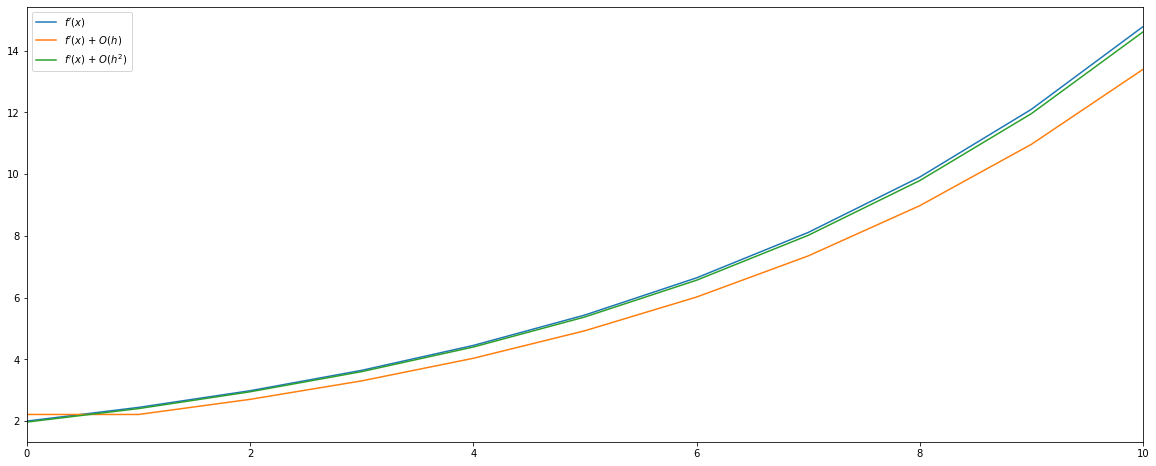

In [10]:
fill_table(args, values, derivs)

## Вычисление второй разностной производной

In [11]:
def difference_derivative(arg, h=0.1):
    
    def f():
        return (3*F(arg) - 4*F(arg - h) + F(arg - 2*h))/(2*h)
        
    g = dfdx(y, 1)
    g = g(arg)
    delta = 1
    error = abs(f() - g)
    while delta > 0:
        h = h/2
        delta = error - abs(f()-g)
        error = abs(f()-g)
    return f(), h

In [12]:
der, h = difference_derivative(2)
der

109.19630007818341

In [13]:
g = dfdx(y, 1)
g(2)

109.19630006628847

In [14]:
abs(g(2) - der)

1.1894940143974964e-08

**Погрешность: $1.189 * 10^{-8}$**

In [15]:
h

1.52587890625e-06

**Оптимальный h: $1.526 * 10^{-6}$**

## Дифференцирование интерполяционного многочлена

In [16]:
def C(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0

In [17]:
def finite_difference(values, rank=4, diffs=[]):
    i = 0
    diffs_for_one = []
    if len(diffs) < rank:
        for value in values:
            if (i < len(values) - 1):
                diffs_for_one.append(np.round(values[i+1] - value, 5))
                i += 1
            else:
                diffs.append(diffs_for_one)
                finite_difference(diffs_for_one, rank, diffs)
    return diffs

In [18]:
diffs  = finite_difference(values)

In [19]:
def derivative_P(x):
    h = 0.1
    a = list(filter(lambda i: i < x, args))[-1:][0]
    q = round((x - a) / h, 3)
    index = args.index(a)
    result = diffs[0][index] / h + (-(2*a + h - 2*x)/(2*h**2)) * diffs[1][index - 1] + (
        -(-3*a**2 + h**2 + 6*a*x - 3*x**2)/(6*h**3)) * diffs[2][index - 1] + (
        ((a + h - x)*(-4*a**2 + h**2 - h*x - 4*x**2 + a*(h + 8*x)))/(24*h**4)) * diffs[3][index - 2]
    return result

**Возьмем точку $x = 0.75$** 

In [20]:
g = dfdx(y, 1)
g(0.75)

8.963378140676129

In [21]:
derivative_P(0.75)

8.962603125000001

In [22]:
abs(g(0.75) - derivative_P(0.75))

0.0007750156761279214

**Погрешность: $7.750 * 10^{-4}$**